In [47]:
import geopandas as gp
import pandas as pd
import plotly.express as px
from shapely.ops import unary_union
import shapely

In [31]:
municipalities = gp.read_file('../data/geo_df.shp')

In [48]:
mappedMuniDist = pd.read_csv('../data/map_muni_dist.csv')

In [49]:
temp = pd.merge(municipalities, mappedMuniDist, on = "istat_code", how = "left")

<AxesSubplot:>

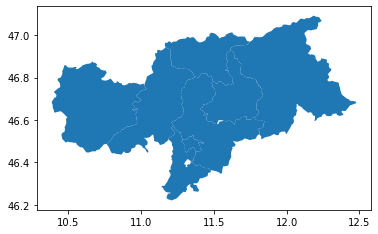

In [50]:
districts = temp.dissolve(by='district_c', aggfunc='sum')
districts.plot()

In [51]:
districts = districts.reset_index()

In [52]:
districts

,district_c,geometry,istat_code,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,CC_UTS,...,Shape_Area,POPCOUNT,arrivi_tot,presenze_t,esercizi_n,letti_nr,arrivi_vs_,arrivi_v_1,presenze_v,presenze_1
0,1,"POLYGON ((11.35870 46.52750, 11.36423 46.52725...",21008,2,4,21,0,21,21008,1,...,5.203870e+07,107760,145395.0,355513.0,218.0,3976.0,36.568159,666.949541,89.414738,1630.793578
1,2,"POLYGON ((11.02312 46.51362, 11.02358 46.51336...",526619,50,100,525,0,525,526619,0,...,1.087709e+09,104858,807271.0,3920536.0,2024.0,44192.0,413.360779,8742.928579,2041.189568,42648.622178
2,3,"POLYGON ((11.52974 46.59407, 11.52973 46.59403...",252703,24,48,252,0,252,252703,0,...,6.215404e+08,54026,454445.0,1954858.0,943.0,20760.0,254.749937,5426.008669,1090.300067,23408.018743
3,4,"POLYGON ((11.90796 46.53177, 11.90090 46.52942...",547664,52,104,546,0,546,547664,0,...,2.068896e+09,80850,1515008.0,7531282.0,3214.0,70318.0,562.425504,12163.617793,2745.146885,58687.219133
4,5,"POLYGON ((11.56456 46.38146, 11.56432 46.38135...",273812,26,52,273,0,273,273812,0,...,1.039881e+09,50455,792131.0,4131191.0,2146.0,40229.0,243.903550,4565.429339,1182.559664,22151.427175
5,6,"POLYGON ((11.31282 46.28001, 11.31394 46.27921...",357779,34,68,357,0,357,357779,0,...,4.155262e+08,73354,279639.0,1262592.0,930.0,18403.0,251.740880,6029.296254,1043.937051,24091.072396
6,7,"POLYGON ((10.59412 46.47020, 10.58326 46.47181...",273798,26,52,273,0,273,273798,0,...,1.439561e+09,35507,373610.0,1630261.0,719.0,19479.0,239.577694,6567.599304,1043.624421,28131.186127
7,8,"POLYGON ((11.59570 46.83382, 11.59745 46.83365...",126350,12,24,126,0,126,126350,0,...,6.505408e+08,23593,251565.0,911077.0,316.0,9929.0,165.487118,5226.901678,511.656529,16281.083920


In [53]:
districts = districts[["district_c", "geometry", "Shape_Area", "POPCOUNT", "esercizi_n", "letti_nr"]]

In [54]:
districts = districts.rename(columns={"Shape_Area": "area", "POPCOUNT": "population", "letti_nr": "beds", "esercizi_n": "numaccomm"})

In [55]:
districts = pd.merge(districts, mappedMuniDist, on = "district_c", how = "left")
del districts['istat_code']
del districts['muni_ge']
del districts['muni_it']
districts.drop_duplicates(keep='first',inplace=True)

In [56]:
districts

,district_c,geometry,area,population,numaccomm,beds,district_ge,district_it
0,1,"POLYGON ((11.35870 46.52750, 11.36423 46.52725...",5.203870e+07,107760,218.0,3976.0,Bozen,Bolzano
1,2,"POLYGON ((11.02312 46.51362, 11.02358 46.51336...",1.087709e+09,104858,2024.0,44192.0,Burggrafenamt,Burgraviato
27,3,"POLYGON ((11.52974 46.59407, 11.52973 46.59403...",6.215404e+08,54026,943.0,20760.0,Eisacktal,Valle Isarco
40,4,"POLYGON ((11.90796 46.53177, 11.90090 46.52942...",2.068896e+09,80850,3214.0,70318.0,Pustertal,Val Pusteria
66,5,"POLYGON ((11.56456 46.38146, 11.56432 46.38135...",1.039881e+09,50455,2146.0,40229.0,Salten-Schlern,Salto-Schiliar
79,6,"POLYGON ((11.31282 46.28001, 11.31394 46.27921...",4.155262e+08,73354,930.0,18403.0,Uberetsch-Unterland,Oltradige-Bassa Ates.
97,7,"POLYGON ((10.59412 46.47020, 10.58326 46.47181...",1.439561e+09,35507,719.0,19479.0,Vinschgau,Val Venosta
110,8,"POLYGON ((11.59570 46.83382, 11.59745 46.83365...",6.505408e+08,23593,316.0,9929.0,Wipptal,Alta Valle Isarco


In [57]:
districts.to_file('../data/geo_district_df.shp', driver='ESRI Shapefile')

C:\Users\gpili\AppData\Local\Temp/ipykernel_13592/2258056083.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts.to_file('../data/geo_district_df.shp', driver='ESRI Shapefile')
